In [1]:
# INTIAL DATA EXPLORATION

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set(style='whitegrid')
file_path = 'train.csv'
df = pd.read_csv(file_path)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
print(df.isnull().sum())

print(df.describe().T)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104   14.4542   31.0   

                  max  
PassengerId  891.0000  
Survived       1.0000  
Pclass         3.0000  
Age           80.0000  
SibSp 

In [8]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
categorical_var = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_var = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables", categorical_var)
print("Numerical Variables", numerical_var)

Categorical Variables ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Variables ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [10]:
# UNIVATIATE ANALYSIS

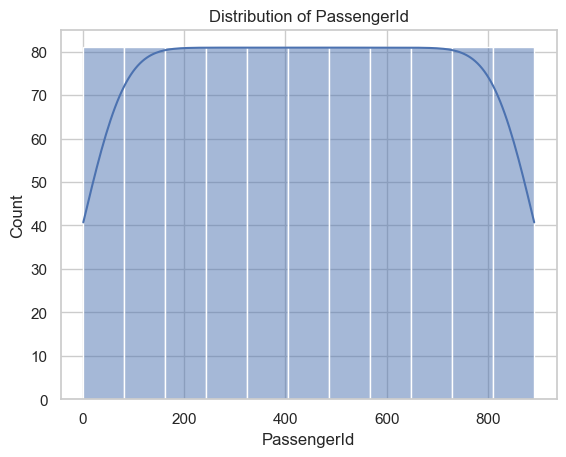

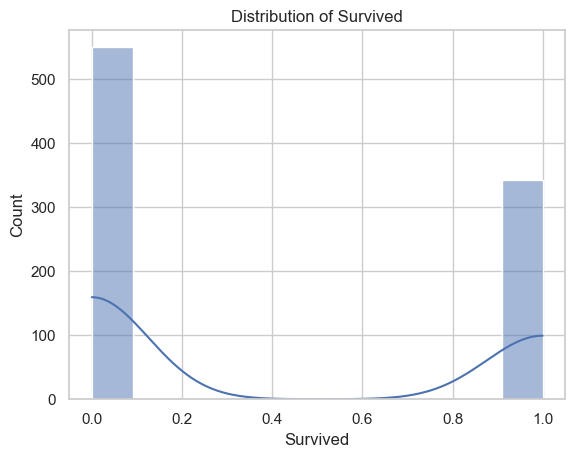

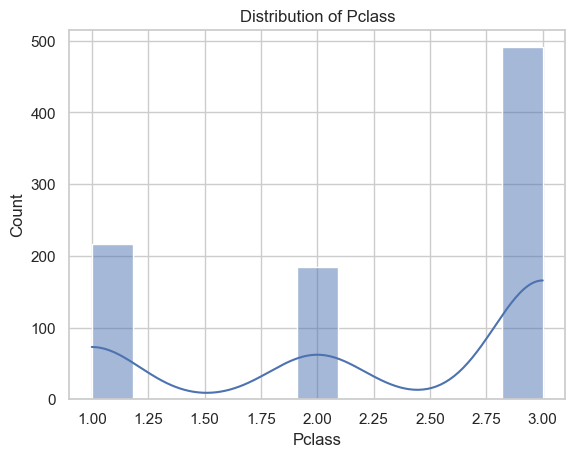

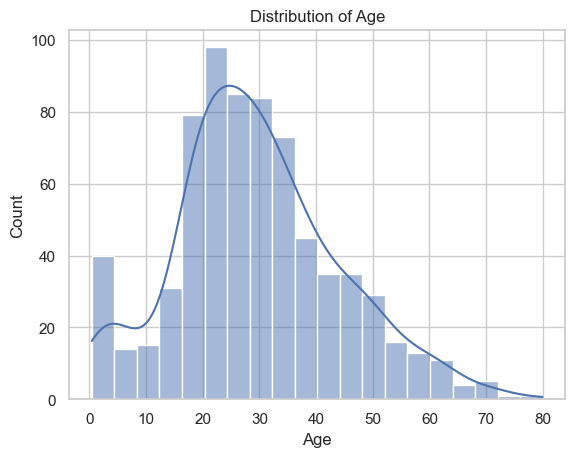

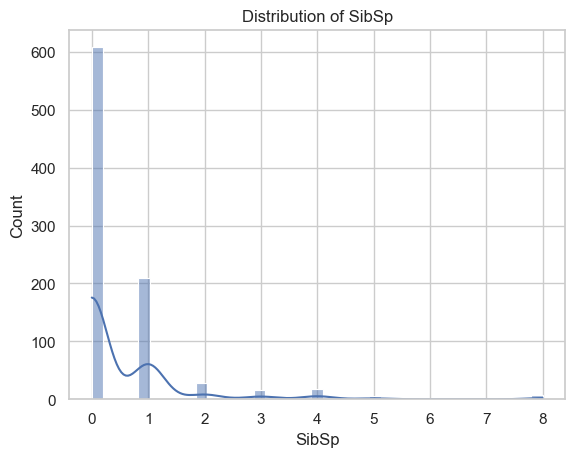

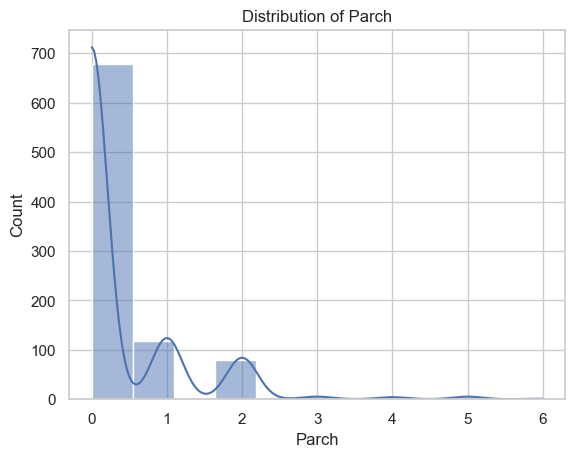

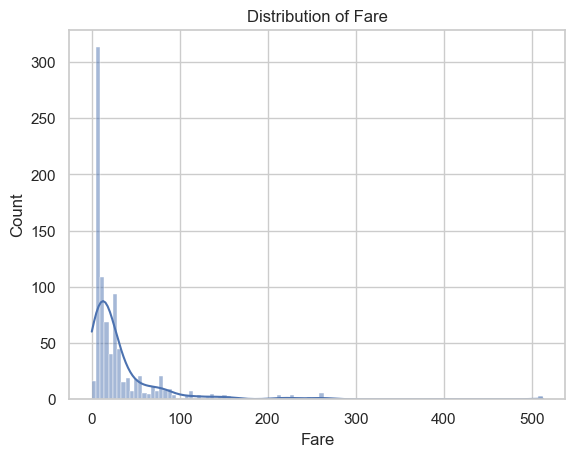

In [11]:
for var in numerical_var:
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f"Distribution of {var}")
    plt.show()

In [12]:
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
df.drop(columns=columns_to_drop, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
numerical_var.remove("PassengerId")
numerical_var

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

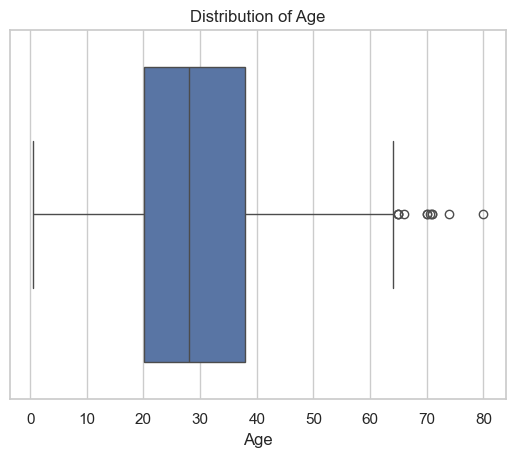

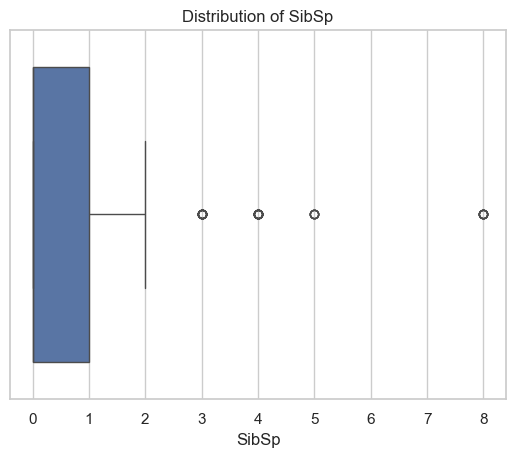

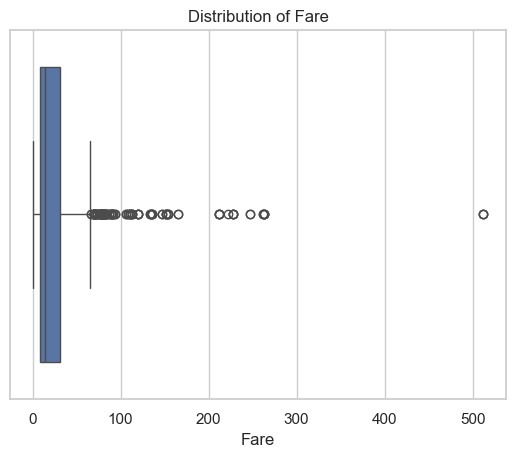

In [14]:
for var in ["Age", "SibSp", "Fare"]:
    sns.boxplot(x=df[var].dropna())
    plt.title(f"Distribution of {var}")
    plt.show()

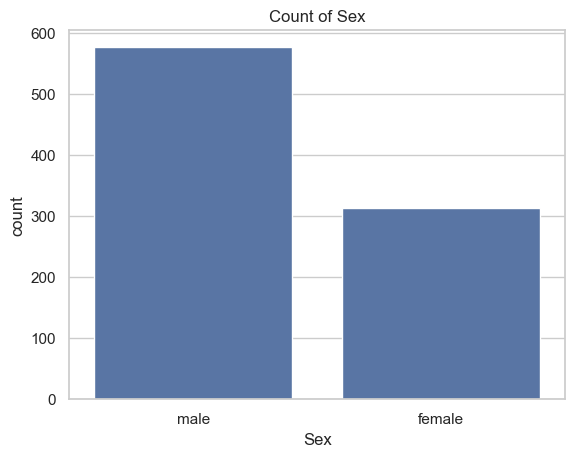

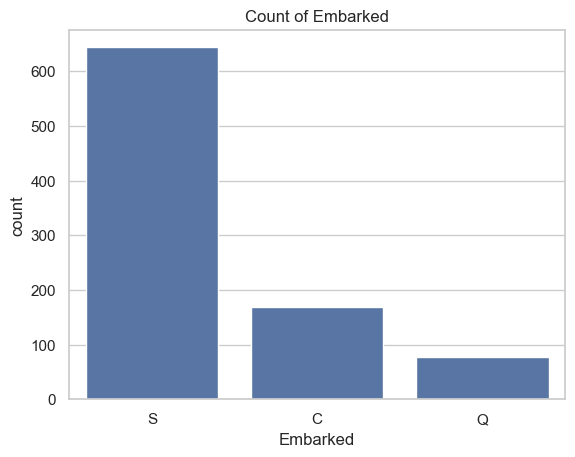

In [15]:
categorical_var = df.select_dtypes(include=["object", "category"]).columns.tolist()
for var in categorical_var:
    sns.countplot(x=var, data=df)
    plt.title(f"Count of {var}")
    plt.show()

In [16]:
# BIVARIATE ANALYSIS

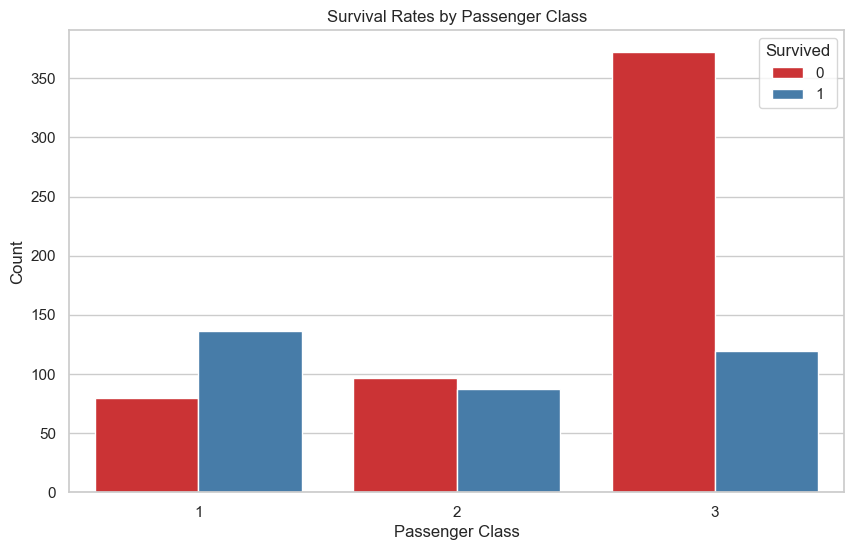

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

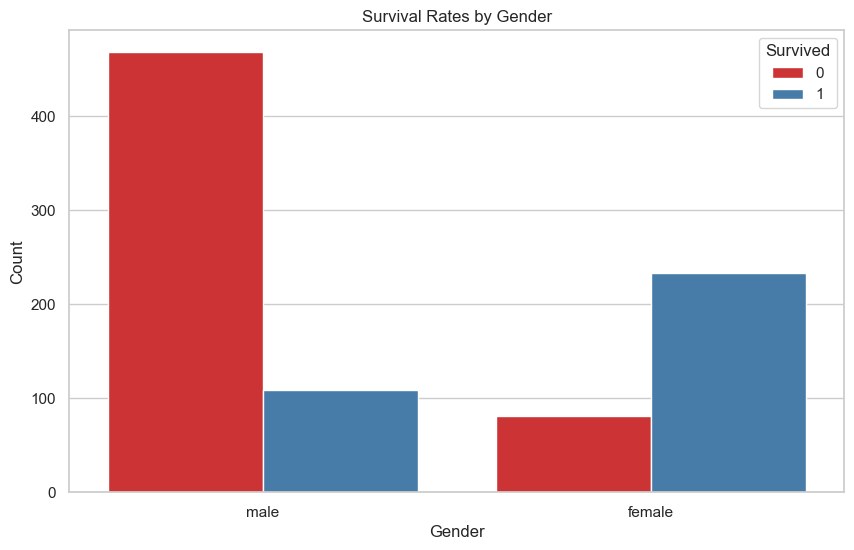

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

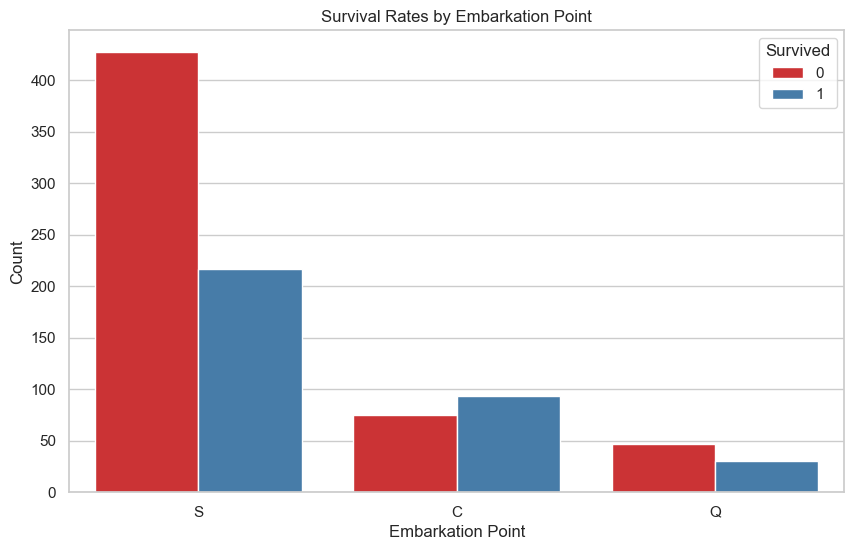

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rates by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

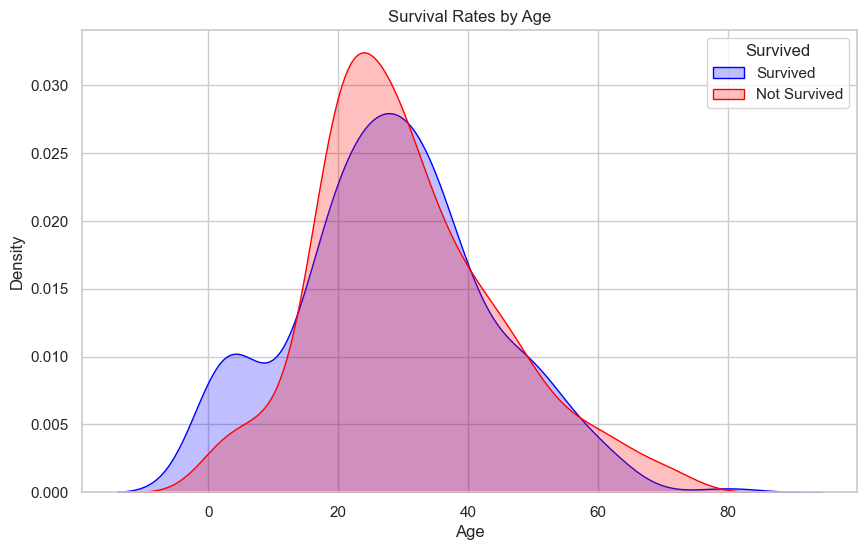

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), fill=True, label='Survived', color='blue')
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), fill=True, label='Not Survived', color='red')
plt.title('Survival Rates by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived')
plt.show()

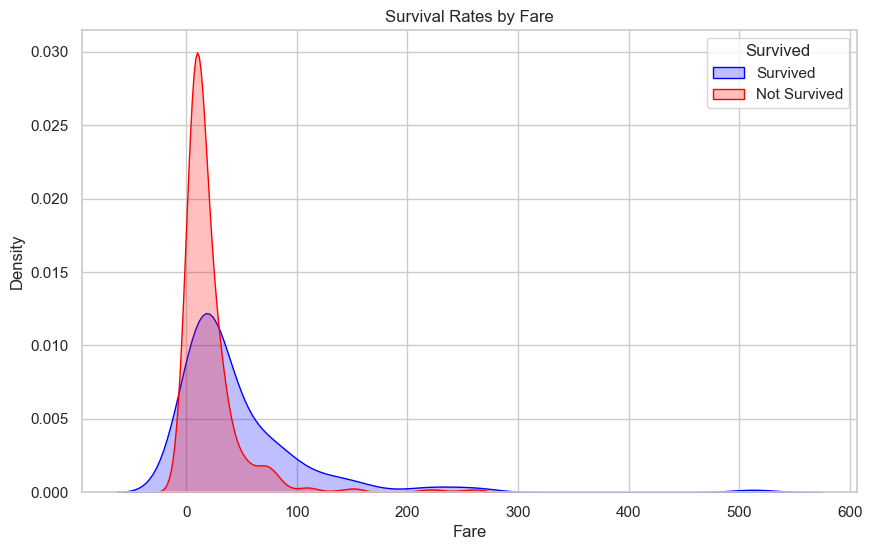

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Fare'], fill=True, label='Survived', color='blue')
sns.kdeplot(df[df['Survived'] == 0]['Fare'], fill=True, label='Not Survived', color='red')
plt.title('Survival Rates by Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Survived')
plt.show()

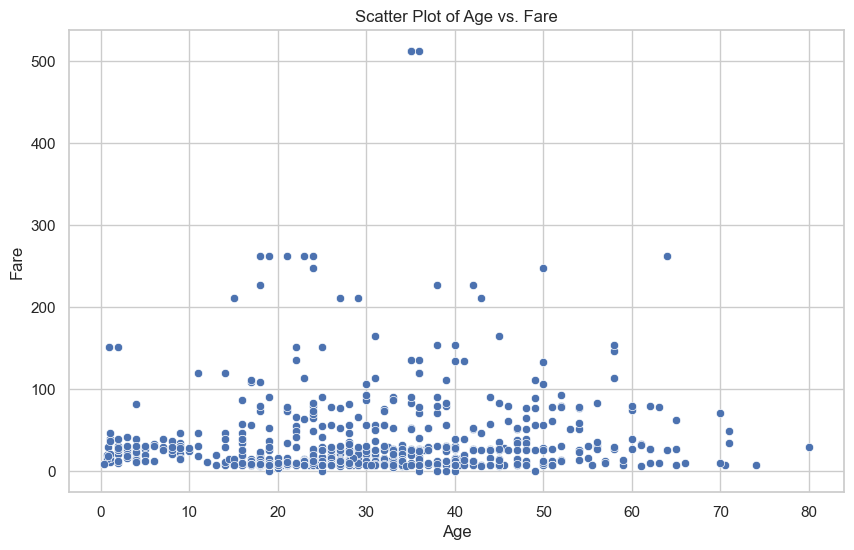

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


In [23]:
#MULTIVARIATE ANALYSIS

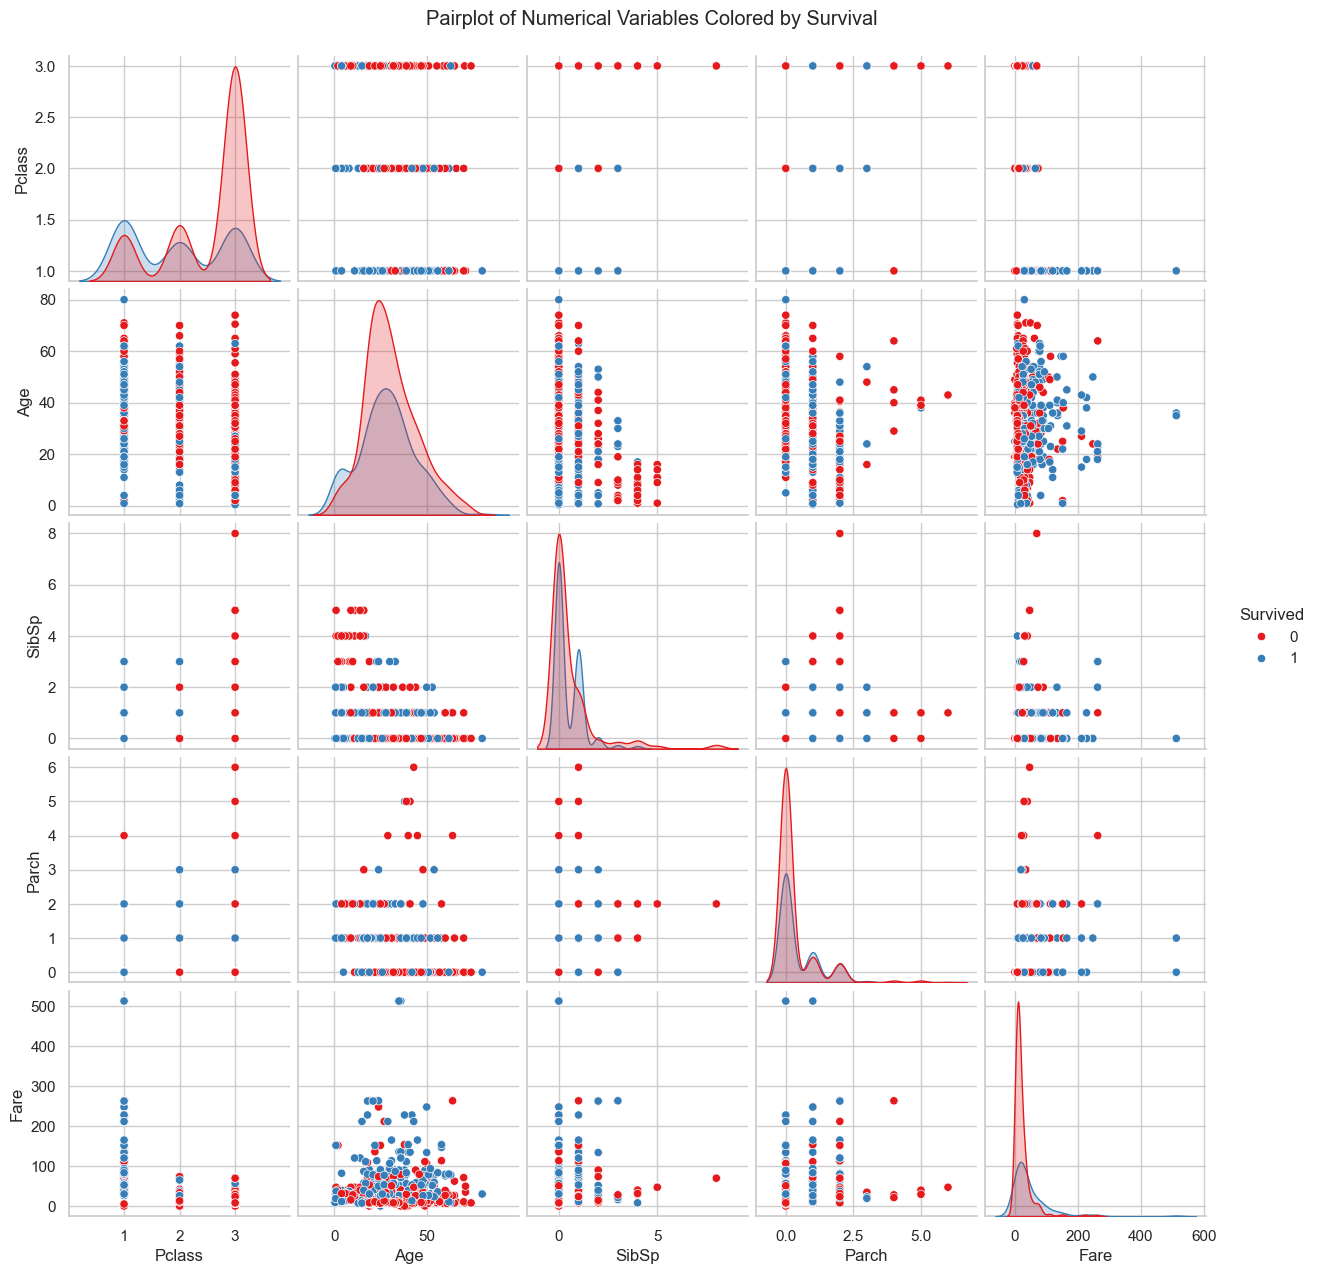

In [24]:
sns.pairplot(df, hue='Survived', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables Colored by Survival', y=1.02)
plt.show()

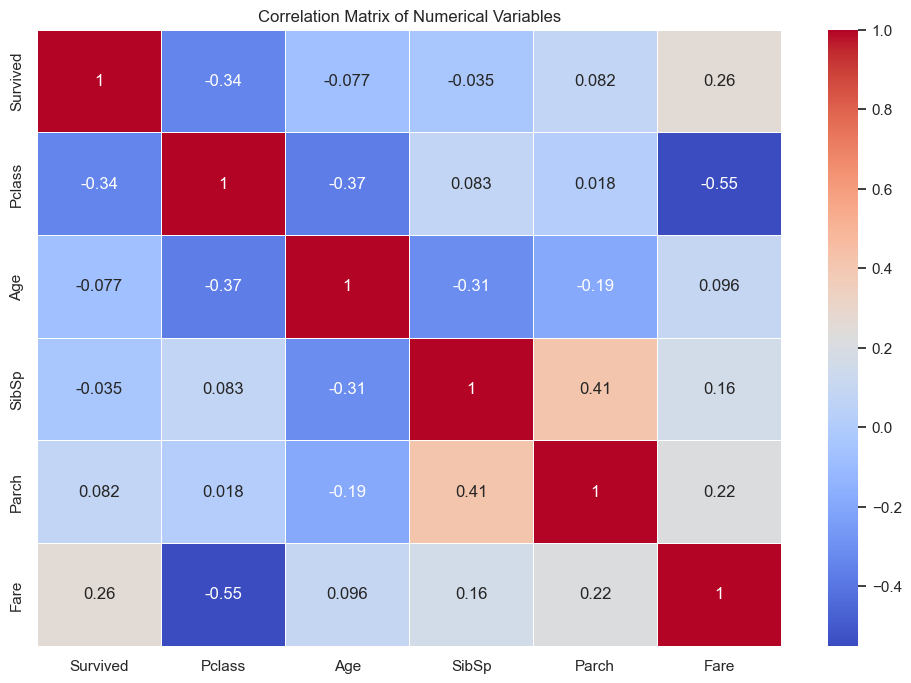

In [25]:
# Heatmap for showing correlation matrix of numerical variables
plt.figure(figsize=(12, 8))
numerical_df = df[numerical_var]  # Use only numerical variables
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

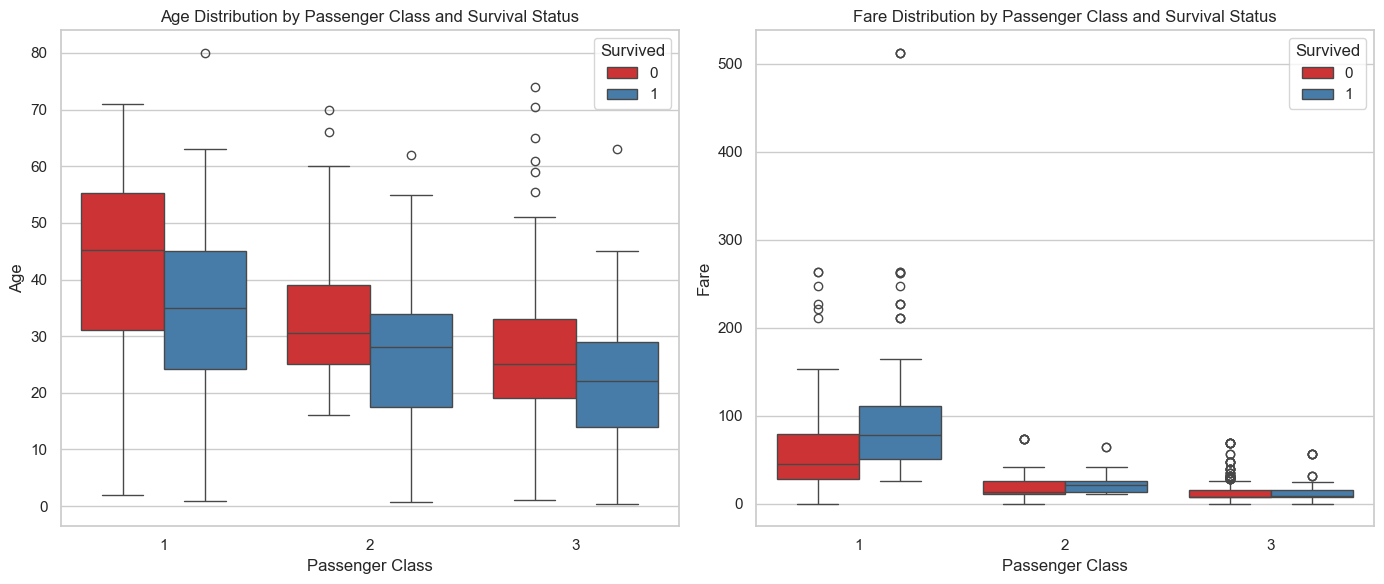

In [26]:
plt.figure(figsize=(14, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df, palette='Set1')
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set1')
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()